José Pedro Pinto - 201603713<br>
27/04/2020 - FCUP<br>

# Introduction

With the rise of computing power and powerful machine learning algorithms, more and more, decisions are being made by a computer. The currently most effective methods are very complex, and their results hard to understand.<br>
In several high risk situations (medical decisions, investments, laws, etc.) we need to know why a model made a particular prediction, in order to guarantee that it is reasonable and that we can explain it to the ones who will be affected, however, with most models that is not possible.<br>

In this project we are going to analyze one of the new methods to handle this kind of problem, the interpret package and the community extension. This will allow us to more easily verify the results from the glass-box methods (those that are already understandable) and to obtain information otherwise unavailable from the black-box ones (those that are not usually understandable).<br>

### Pre-Requirement

dash and dash_cytoscape are requirements for the use of interpret, however, we were not able to get them working locally.<br>
As such they are installed directly in the notebook.<br>

In [1]:
!pip install dash
!pip install dash_cytoscape

### Data import and visualization

In [2]:
import pandas as pd
loans = pd.read_csv("loans.csv")
loans

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2.0,0.0,0.0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5.0,0.0,0.0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8.0,0.0,0.0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5.0,0.0,0.0,1


In [3]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9574.000000,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.931874,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,0.026847,207.071301,0.614736,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927987,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


Now we will check data integrity by verifying if there are any missing values.<br>

In [4]:
print(loans.isna().any())

credit.policy        False
purpose              False
int.rate             False
installment          False
log.annual.inc        True
dti                  False
fico                 False
days.with.cr.line     True
revol.bal            False
revol.util            True
inq.last.6mths        True
delinq.2yrs           True
pub.rec               True
not.fully.paid       False
dtype: bool


### Handling missing values

There are several missing values, and after analyzing the variable meanings, we have determined that the missing values likely have no special meaning.<br>
There are two primary options now, either remove entries with missing values or impute them.<br>
As the dataset is not huge, being only about 10000 entries, we decided to impute the values.<br>

In [5]:
from sklearn.impute import SimpleImputer
import numpy as np
#get numerical columns (all except for purpose)
numericalColumns = loans.drop("purpose",axis=1)

#create mean central imputer
meanImputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#impute data with the mean values and turn back to dataframe
numericalImputed = pd.DataFrame(meanImputer.fit_transform(numericalColumns))

#add back column "purpose" in the same position
numericalImputed.insert(1,"purpose",loans["purpose"])

In [6]:
#rename variable for clarity
loansImputed = numericalImputed
#change column names to the ones in the original data
loansImputed.columns = loans.columns
#change column types to the ones in the original data
loansImputed = loansImputed.astype(loans.dtypes.to_dict())

### Scaling feature values

Several machine learning and statistical methods are sensitive to the scale of the data, as such we now apply a min-max scaler to our data.<br>
We have decided to impute them using min-max imputation, rather than some other, in order to make future analysis easier.<br>

In [7]:
from sklearn.preprocessing import MinMaxScaler
#get numerical columns (all except for purpose)
numericalColumns = loansImputed.drop("purpose",axis=1)

#create mean central imputer
scaler = MinMaxScaler()
#impute data with the mean values and turn back to dataframe
numericalScaled = pd.DataFrame(scaler.fit_transform(numericalColumns))

#add back column "purpose" in the same position
numericalScaled.insert(1,"purpose",loans["purpose"])

In [8]:
#rename variable for clarity
loansScaled= numericalScaled
#change column names to the ones in the original data
loansScaled.columns = loans.columns
#change column types to the ones in the original data
loansScaled = loansScaled.astype(loans.dtypes.to_dict())

We now will do boxplots of all numerical variables.<br>
We could have done this before, however, given that all features were in different scales, we could not place them in the same plot.<br>

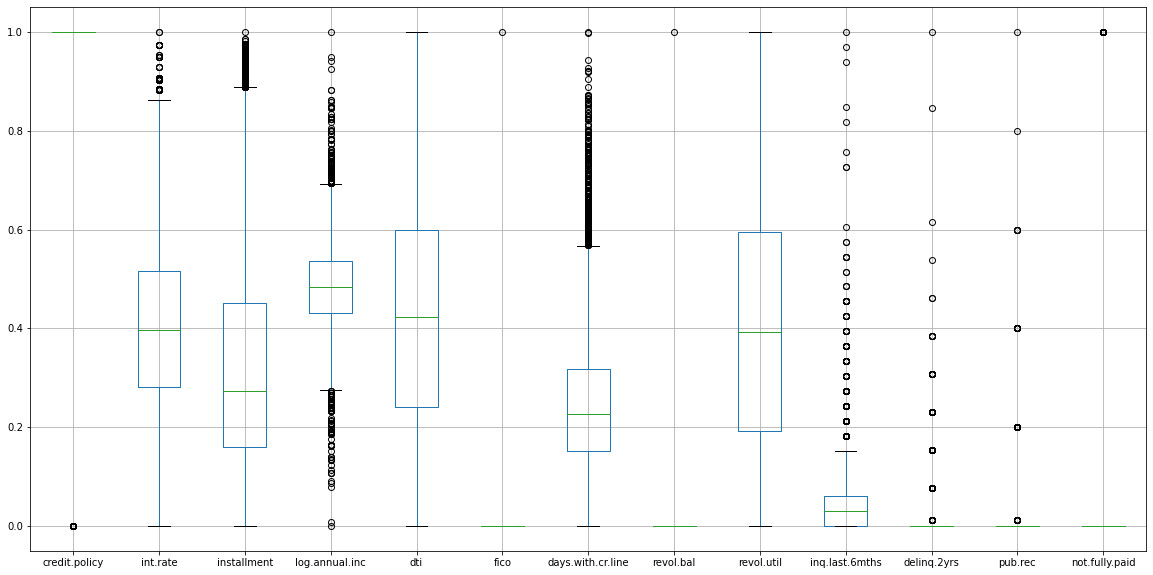

In [9]:
loansNumeric = loansScaled.drop("purpose",axis=1)
boxplot = loansNumeric.boxplot(column=loansNumeric.columns.to_list(),figsize = (20,10))

There are plenty of outliers, however, with such a large dataset it would e expected, and there are no extreme outliers.<br>

### Dummies

Most machine learning methods can only work with numerical data, as such we will now create dummy variables for our only categorical feature "purpose".<br>

In [10]:
#number of diferent values for purpose variable
len(loansScaled["purpose"].unique())

7

With only 7 values for our variable, dummies will not create a very sparse dataset, which will improve learning and results.<br>

In [11]:
from sklearn.preprocessing import OneHotEncoder
loansDummies = pd.get_dummies(loansScaled)
loansDummies

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.376598,0.879888,0.544762,0.650200,0,0.312754,0,0.437815,0.000000,0.000000,0.0,0,0,0,1,0,0,0,0
1,1,0.301151,0.229916,0.506334,0.476969,0,0.147818,0,0.644538,0.000000,0.000000,0.0,0,0,1,0,0,0,0,0
2,1,0.484015,0.379883,0.404820,0.388184,0,0.259495,0,0.215126,0.030303,0.000000,0.0,0,0,0,1,0,0,0,0
3,1,0.260870,0.158653,0.544762,0.270360,0,0.144379,0,0.615126,0.030303,0.000000,0.0,0,0,0,1,0,0,0,0
4,1,0.528133,0.094378,0.537503,0.499666,0,0.222613,0,0.331933,0.000000,0.076923,0.0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.550512,0.355977,0.663709,0.346796,0,0.589602,0,0.689916,0.060606,0.000000,0.0,1,1,0,0,0,0,0,0
9574,0,0.417519,0.261804,0.514888,0.007009,0,0.240596,0,0.009244,0.151515,0.000000,0.0,1,1,0,0,0,0,0,0
9575,0,0.301151,0.088851,0.436785,0.436916,0,0.187337,0,0.696639,0.242424,0.000000,0.0,1,0,0,1,0,0,0,0
9576,0,0.639386,0.363354,0.468750,0.640187,0,0.092838,0,0.026891,0.151515,0.000000,0.0,1,0,0,0,0,1,0,0


Now we will split the data into train and test sets, with the intended proportion of 80%-20%.<br>

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split

targetColumn = loansDummies["not.fully.paid"]
featureColumns = loansDummies.drop("not.fully.paid",axis=1)

In [13]:
#split the data into train and test, x and y
loansTrainX, loansTestX, loansTrainY, loansTestY = train_test_split(featureColumns,            
                                                    targetColumn,  
                                                    test_size=0.2,
                                                    random_state=1)

# Modeling

## Glass Box Models

The glass box models we are going to use are linear regression, logistic regression, regression trees and the explainable boosting regressor.<br>

In [14]:
from interpret.glassbox import LinearRegression, LogisticRegression, RegressionTree, ExplainableBoostingRegressor

### Linear Regression - LR

We will start with one of the simplest and oldest glass box method, linear regression.<br>
Due to its simplicity and low complexity we are unlikely to overfit the data.<br>
The results for this model will be used as a baseline, in further analysis.<br>

In [15]:
LRModel = LinearRegression()
LRModel.fit(loansTrainX, loansTrainY);

Now that we have the trained model lets verify the train and test accuracies.<br>

In [16]:
from sklearn.metrics import accuracy_score
#get predicted values for train data
trainPred = LRModel.predict(loansTrainX).round()
#get predicted values for test data
testPred = LRModel.predict(loansTestX).round()

print(accuracy_score(loansTrainY,trainPred))
print(accuracy_score(loansTestY,testPred))

0.8420777864787262
0.831419624217119


The accuracies are quite high and very close, which indicates no serious under of over fitting.<br>
We will no proceed with a more in depth analysis of the obtained results, using interpret_community GUI extension.<br>

In [17]:
from interpret_community.widget import ExplanationDashboard
from interpret.ext.blackbox import MimicExplainer
from interpret.ext.glassbox import LGBMExplainableModel
from interpret.ext.glassbox import LinearExplainableModel
from interpret.ext.glassbox import SGDExplainableModel
from interpret.ext.glassbox import DecisionTreeExplainableModel

#several of the functionalities used by interpret_community are deprecated, therefore producing warnings.
#Use this to prevent the screen from being filled with warnings.
import warnings; warnings.simplefilter('ignore')

#create an explained for our trained model using the linear explainer
explainer = MimicExplainer(LRModel, 
                           loansTestX, 
                           LinearExplainableModel, 
                           features=loansTrainX.columns.to_list())

#get a global explanaion of the data
LRGlobal = explainer.explain_global(loansTestX)

#show the explanation GUI
ExplanationDashboard(LRGlobal, LRModel, datasetX=loansTestX);

After exploring the above results, several things can be noted.<br>
The linear models seems to only have obtained an intercept, with the coefficients for all variables being 0.<br>
There are a few explanations to this. First, we may have a bug in our code, second, the package itself may have a bug, and third, there may exist a regularization term.<br>
Running the exact same code with a different dataset provided the weights for the model. This is reasonably strong evidence to contradict the first and second hypothesis.<br>
Leading us to conclude that the linear regression model has a regularization term (such as LASSO).<br>

### Logistic Regression - LogR

Logistic regression is similar to linear regression, but instead of a linear function uses a logistic function.<br>
Due to the complexity of our data and the increased expressiveness of this model, we expect better results than with linear regression.<br>

In [18]:
LogRModel = LogisticRegression()
LogRModel.fit(loansTrainX, loansTrainY);

Now that we have the trained model lets verify the train and test accuracies.

In [19]:
#get predicted values for train data
trainPred = LogRModel.predict(loansTrainX).round()
#get predicted values for test data
testPred = LogRModel.predict(loansTestX).round()

print(accuracy_score(loansTrainY,trainPred))
print(accuracy_score(loansTestY,testPred))

0.8423388149308274
0.8324634655532359


The accuracies are quite high and very close, which indicates no serious under of over fitting. However, the results are not much better than with linear regression<br>
We will not proceed with a more in depth analysis of the obtained results, using interpret_community GUI extension.<br>

In [20]:
#several of the functionalities used by interpret_community are deprecated, therefore producing warnings.
#Use this to prevent the screen from being filled with warnings.
import warnings; warnings.simplefilter('ignore')

#create an explained for our trained model using the linear explainer
explainer = MimicExplainer(LogRModel, 
                           loansTestX, 
                           LinearExplainableModel, 
                           features=loansTrainX.columns.to_list())

#get a global explanaion of the data
LogRGlobal = explainer.explain_global(loansTestX)

#show the explanation GUI
ExplanationDashboard(LogRGlobal, LogRModel, datasetX=loansTestX);

The first thing to note is that this time, with equivalent code we obtained the importance values for the predictions.<br>
The most important feature is by far the credit policy, in fact, all observations with credit policy of 1 where identified with the same class.<br>
The second most important feature is “int.rate”, interest rate. The importance of this variable makes sense, given that its real importance is two-fold. First we would expect people with higher interest rates to have more difficulty paying back, secondly, the interest rate is assigned based on the risk of the individual, with higher risk individuals being expected to pay less often.<br>
The third variable of most importance is “revo.util”, however at this point a clear pattern is harder to spot.<br>

It is also worth noting that the variables "revo.bal", "delinq.2yrs" and "fico" have a weight of almost 0.<br>
Lets now explore a few particular cases and check how the decision was made.<br>
Given that the majority of cases are of class 0, we will focus our efforts in those of class 1.<br>

The first one we will look at is the entry with index 329.<br>

In [21]:
row = 329
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
329,0,0.535806,0.03323,0.494868,0.712283,0,0.326501,0,0.446218,0.727273,0.0,0.0,1,0,0,0,0,0,0


By a large margin, the variable that is the most important is "inq.last.6mths", which is in the top percentile for the value. With a recent large amount of inquiries by the creditors, suggesting some kind of problem of late payment, we would expect this class.<br>

By perturbing some of the values, some things can be noted.<br>
First, changing "credit.policy", as expected changes the class.<br>
Decreasing the "int.rate" (interest rate) changes the class, while increasing "installment" (value owed each month) increases our confidence in the prediction.<br>
All these factors make logical sense, and are the most important factors in this particular decision.<br>

The second and last case we are going to look at is the entry with index 574.<br>

In [22]:
row = 574
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
574,0,0.758312,0.451415,0.437927,0.428238,0,0.15463,0,0.812605,0.363636,0.0,0.2,0,0,1,0,0,0,0


Once again, the most important feature is "inq.last.6mths", however, with a relatively low value this time, has a slightly decrease in importance when compared to the last case.<br>
This time "revo.util" (credit utilization vs total credit) is substantially more important, due to it being in the upper amounts.<br>
Interest rate is algo very important and of high value.<br>
This suggests an individual, whose credit use is high, while the also high interest rate prevents repayment, leading to large amounts of inquiries.<br>

By perturbing some of the values, some things can be noted.<br>
First, changing "credit.policy", as expected changes the class.<br>
Once more decreasing the value of "int.rate" changes class. Decreasing "revo.util", also changes the class.<br>
Once more the results are consistent with our intuitive understanding and require no further analysis.<br>

### Regression Trees

Regression trees are the last classical glass box model we will analyze.<br>
They work by making a set of decisions in a row, following a tree structure to pick the decisions and selected classes.<br>

In [23]:
treeModel = RegressionTree()
treeModel.fit(loansTrainX, loansTrainY);

Now that we have the trained model lets verify the train and test accuracies.

In [24]:
#get predicted values for train data
trainPred = treeModel.predict(loansTrainX).round()
#get predicted values for test data
testPred = treeModel.predict(loansTestX).round()

print(accuracy_score(loansTrainY,trainPred))
print(accuracy_score(loansTestY,testPred))

0.8423388149308274
0.831419624217119


The accuracies are quite high and very close, which indicates no serious under of over fitting. However, the results are not much better than with linear regression, and being similar to logistic regression.<br>
We will now proceed with a more in depth-analysis of the obtained results, using interpret_community GUI extension.

In [25]:
#several of the functionalities used by interpret_community are deprecated, therefore producing warnings.
#Use this to prevent the screen from being filled with warnings.
import warnings; warnings.simplefilter('ignore')

#create an explained for our trained model using the decision tree explainer
explainer = MimicExplainer(treeModel, 
                           loansTestX, 
                           DecisionTreeExplainableModel, 
                           features=loansTrainX.columns.to_list())

#get a global explanaion of the data
treeGlobal = explainer.explain_global(loansTestX)

from interpret import show
#show tree structure
show(treeModel.explain_global(loansTestX))
#show the explanation GUI
ExplanationDashboard(treeGlobal, treeModel, datasetX=loansTestX);

<!-- http://127.0.0.1:7728/983747889472/ -->

Given that this is a decision tree, we will use, unlike for the other models, the function "show" from "interpret", to visualise the tree.<br>
In agreement with the last model, "credit.policy" is the first to be used, splitting the data by the middle value (0.5).<br>

The importance of the variables is about the same, with the same orders, except for "inc.last.6months" which has jumped in importance to 3rd place.<br>
The overall values are close to the real ones, however, for the classification task, the output is not good, with only 2 values above 0.5, meaning only two values would be predicted as class 1.<br>

Lets now look at one of these (class 1), with index 646.

In [26]:
row = 646
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
646,1,0.26087,0.146419,0.417657,0.624833,0,0.213106,0,0.832773,0.060606,0.0,0.0,0,0,1,0,0,0,0


Unlike for the previous model (logistic regression), increasing "int.rate" or "installment", changes the class to the class 0. This does not make sense, implying that the model did not learn a correct rule, only an accurate one.<br>
No further analysis on particular cases will be performed for this model, as it is clear that such results will keep appearing.<br>

### Explainable Boosting Regressor - EBM

EBM is the last glass box model we are going to analyze.<br>
EBM is a recent development, created with the goals of achieving performance equivalent to state-of-the-art methods, such as, random forests or neural networks, while still being interpretable. These goals have, according to the creators, been achieved.<br>

In [27]:
EBMModel = ExplainableBoostingRegressor()
EBMModel.fit(loansTrainX, loansTrainY);

Now that we have the trained model lets verify the train and test accuracies.

In [28]:
#get predicted values for train data
trainPred = EBMModel.predict(loansTrainX).round()
#get predicted values for test data
testPred = EBMModel.predict(loansTestX).round()

print(accuracy_score(loansTrainY,trainPred))
print(accuracy_score(loansTestY,testPred))

0.8429913860610807
0.8308977035490606


The accuracies are quite high and very close, which indicates no serious under of over fitting. The results are very similar to the ones from the previous methods, being in fact very slightly worse.<br>
We will now proceed with a more in-depth analysis of the obtained results, using interpret_community GUI extension.

In [29]:
#several of the functionalities used by interpret_community are deprecated, therefore producing warnings.
#Use this to prevent the screen from being filled with warnings.
import warnings; warnings.simplefilter('ignore')

#create an explained for our trained model using the linear explainer
explainer = MimicExplainer(EBMModel, 
                           loansTestX, 
                           LinearExplainableModel, 
                           features=loansTrainX.columns.to_list())

#get a global explanaion of the data
EBMGlobal = explainer.explain_global(loansTestX)

#show the explanation GUI
ExplanationDashboard(EBMGlobal, EBMModel, datasetX=loansTestX);

Once again, the most important feature is credit policy. The other feature importance’s are in line with the ones from the decision tree. In fact the predictions are also very similar to the ones from the decision tree, with very few entries obtaining a value over 0.5, and as such few being classified with class one.<br>

We will once more focus on the variables from class 1.<br>

Lets now look at one of these (class 1), with index 996.<br>

In [30]:
row = 996
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
996,0,0.817136,0.971324,0.536078,0.388518,0,0.328279,0,0.317647,0.121212,0.0,0.0,0,0,0,0,0,0,1


The notable features of this entry are the high "int.rate" and the extremely high "installment".<br>
One feature that does not look notable and yet has a large weight in the decision is the fact that the loan was for a small business. In fact, every other type of loan would be predicted as class 0.<br>

We can also see that reducing either the "int.rate" or the "instalment" would result in a different class.<br>
Looking at the "ICE" plots, we see that, the predicted value is not linear in these values, but nevertheless, follows a reasonable curve, mostly increasing as these value are also increased.<br>

Lets now look at the second entry, with index 1704.<br>

In [31]:
row = 1704
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
1704,0,0.861253,0.940917,0.532451,0.405207,0,0.092835,0,0.637815,0.121212,0.0,0.0,0,0,0,0,0,0,1


For this entry, which is one of the very few with class 1 we can see that the values and import aces are almost identical to the previous case. Such leaves us to believe that only under very specific circumstances will the model predict class 1 and that those are always the same.<br>
Given the similarity with the previous entry we will not analyze the values in detail.<br

## Black Box Models

Black box models are those which are not inherently interpretable. These comprise the bulk of the modern high performance models, and as such being able to understand their results would be very useful.<br>
This will be done, much like in the previous part, with the use of the interpret library.<br>
We will look at a total of 3 models, with those being, random forests, support vector machines and artificial neural networks.<br>

### Random Forests

Random forests use an ensemble of decision trees in order to make a prediction, this allows a high flexibility while having a lower chance to overfit, usually leading to a discrepancy between train and test set error. Despite of this discrepancy, the test performance usually surpasses the one in decision trees.<br>
Random forests are considered, by some authors, glass box, interpretable, methods. We will, however, not consider them as such. The combination of decision trees, using different entries and in each node parameters, does not seem to very understandable.<br>  

In [32]:
from sklearn.ensemble import RandomForestRegressor

forestModel = RandomForestRegressor().fit(loansTrainX, loansTrainY);
forestModel

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
#get predicted values for train data
trainPred = forestModel.predict(loansTrainX).round()
#get predicted values for test data
testPred = forestModel.predict(loansTestX).round()

print(accuracy_score(loansTrainY,trainPred))
print(accuracy_score(loansTestY,testPred))

1.0
0.8272442588726514


The model accuracies behaved as expected, with the train accuracy extremely high and different from the lower, but yet high, test accuracy.<br>
Although usually these values would indicate overfitting, this is common, and as such no concern, for random forests.<br>
We will now proceed with a more in depth analysis of the obtained results, using interpret_community GUI extension.<br>

In [34]:
from interpret.ext.blackbox import TabularExplainer

#several of the functionalities used by interpret_community are deprecated, therefore producing warnings.
#Use this to prevent the screen from being filled with warnings.
import warnings; warnings.simplefilter('ignore')

#create an explained for our trained model using automatically picked explainer
explainer = TabularExplainer(forestModel, 
                           loansTestX, 
                           features=loansTrainX.columns.to_list())

#get a global explanaion of the data
forestGlobal = explainer.explain_global(loansTestX)

#show the explanation GUI
ExplanationDashboard(forestGlobal, forestModel, datasetX=loansTestX);

Unlike for all the previous methods, for which "credit.policy" was the most important variable, for random forests, the "int.rate" is the most important one. "credit.policy" is still, nevertheless, very important, in second place.<br>
The biggest change in the importance metrics is the "log.annual.inc", now in third place, while in all the other methods, was substantially less important.<br>

As usual lets now analyse some of the entries classified as the class 1.<br>
Lets now look at one of these (class 1), with index 223.<br>

In [35]:
row = 223
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
223,0,0.883632,0.985603,0.581696,0.540721,0,0.689021,0,0.10084,0.0,0.076923,0.0,0,0,0,0,0,0,1


Much like with the entries with class 1 in decision trees and EBM, this entry has high "int.rate" and very high "installment".<br>
Surprisingly, changing "credit.policy" to 1 gives a value of 0.5, meaning it would still be classified as being of class 1. This is the first instance in which this happens.<br>
Lowering "int.rate" or "installment" results in a class change, as we would expect.<br>

The second entry we are going to look at is the one with index 725.<br>

In [36]:
row = 725
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
725,1,0.0,0.188724,0.427158,0.343792,0,0.11351,0,0.007563,0.181818,0.0,0.0,0,0,0,0,1,0,0


This one in particular is quite interesting, with an "int.rate" of 0 and low "installment", which on top also has "credit.policy" of 1.<br>
All this should imply almost certainly that this would be of class 0, which is the real class. This indicates some overfitting, given that it goes against the general data distribution.<br>

Slightly increasing any of these values causes the predicted class to be 0 once more. This goes against common sense and what was observed for all previous models.<br>

### Support Vector Machines - SVM

Support vector machines use a "kernel" function to transform the data into a higher dimensional one and then find a linear model, in that new space, to make predictions. We expect it to perform similarly to the previous methods.<br>

In [48]:
from sklearn import svm

SVMModel = svm.SVC().fit(loansTrainX, loansTrainY);
SVMModel

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [49]:
#get predicted values for train data
trainPred = SVMModel.predict(loansTrainX).round()
#get predicted values for test data
testPred = SVMModel.predict(loansTestX).round()

print(accuracy_score(loansTrainY,trainPred))
print(accuracy_score(loansTestY,testPred))

0.8420777864787262
0.831419624217119


The model accuracies are, as expected, similar to the ones from the previous models.<br>
We will no proceed with a more in depth analysis of the obtained results, using interpret_community GUI extention.<br>

In [50]:
from interpret.ext.blackbox import TabularExplainer

#several of the functionalities used by interpret_community are deprecated, therefore producing warnings.
#Use this to prevent the screen from being filled with warnings.
import warnings; warnings.simplefilter('ignore')

#create an explained for our trained model using automatically picked explainer
#create an explained for our trained model using LGBM explainer
explainer = MimicExplainer(SVMModel, 
                       loansTestX, 
                       LGBMExplainableModel, 
                       features=loansTrainX.columns.to_list())

#get a global explanaion of the data
SVMGlobal = explainer.explain_global(loansTestX)

#show the explanation GUI
ExplanationDashboard(SVMGlobal, SVMModel, datasetX=loansTestX);

Unlike for most of the previous methods, for which "credit.policy" was the most important variable, for the SVM, the "int.rate" is the most important one, like in random forests.<br>
"credit.policy" is now with its lowest importance so far, in fourth place. The biggest change in the importance metrics is the "inq.last.6mths", now in third place, while in all the other methods, was substantially less important.

As usual lets now analyse some of the entries classified as the class 1. Lets now look at one of these (class 1), with index 427.<br>

In [51]:
row = 427
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
427,0,0.773018,0.766104,0.5214,0.805407,0,0.204515,0,0.394958,0.151515,0.0,0.2,0,0,0,0,0,0,1


Much like with the entries with class 1 in decision trees and EBM, this entry has high "int.rate" and very high "installment". Surprisingly, changing "credit.policy" to 1 gives a value of 0.753, meaning it would still be classified as being of class 1. This is the second instance in which this happens. We need to lower both "int.rate" and "installment" to obtain a class change, being much more rigid than previous methods.<br>

The second entry we are going to look at is the one with index 1197.<br>

In [52]:
row = 1197
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
1197,1,0.786445,0.964801,0.743347,0.4002,0,0.286985,0,0.046218,0.212121,0.0,0.0,0,0,0,0,0,0,1


This one in particular is quite interesting, with an "int.rate" of 0 and low "installment". All this should imply almost certainly that this would be of class 0. This shows the previously found rigidity to these features.<br>

### Neural Networks - NN

Neural networks have in the recent years, resurged with a lot of popularity, on account of the increase in computing power and dataset sizes. They have been used to achieve results, which were previously thought impossible.<br>
However, the types of datasets in which these results are achieved are quite different from the one we are using. As such we expect similar results to the ones obtained by most of the previous methods.<br>

In [42]:
from sklearn.neural_network import MLPClassifier

MLPModel = MLPClassifier().fit(loansTrainX, loansTrainY);
MLPModel

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [43]:
#get predicted values for train data
trainPred = MLPModel.predict(loansTrainX).round()
#get predicted values for test data
testPred = MLPModel.predict(loansTestX).round()

print(accuracy_score(loansTrainY,trainPred))
print(accuracy_score(loansTestY,testPred))

0.8467762986165492
0.8319415448851775


The model accuracies are, as expected, similar to the ones from the previous models.<br>
We will now proceed with a more in depth analysis of the obtained results, using interpret_community GUI extension.<br>

In [44]:
from interpret.ext.blackbox import TabularExplainer

#several of the functionalities used by interpret_community are deprecated, therefore producing warnings.
#Use this to prevent the screen from being filled with warnings.
import warnings; warnings.simplefilter('ignore')

#create an explained for our trained model using LGBM explainer
explainer = MimicExplainer(MLPModel, 
               loansTestX, 
               LGBMExplainableModel, 
               features=loansTrainX.columns.to_list())

#get a global explanaion of the data
MLPGlobal = explainer.explain_global(loansTestX)

#show the explanation GUI
ExplanationDashboard(MLPGlobal, MLPModel, datasetX=loansTestX);

In line with the previous black box methods, "credit.policy" has a lower importance, while "int.rate" a higher one. Both the values and order are quite similar to the one from the SVM.<br>

As usual lets now analyse some of the entries classified as the class 1.<br>
Lets now look at one of these (class 1), with index 243.<br>

In [45]:
row = 243
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
243,0,0.381714,0.195831,0.549731,0.695594,0,0.286982,0,0.7,0.515152,0.0,0.2,0,0,1,0,0,0,0


This entry has a low "int.rate" and "installment", however, it was classified as 1 due to high  "inq.last.6mths" and "credit.policy" of 0.<br>
Surprisingly, increasing the "int.rate", causes a change in class, which goes against common sense. At the same time, a change in "credit.policy" does not change its class.<br>

The second entry we are going to look at is the one with index 1704.

In [46]:
row = 1704
loansTestX.reset_index(drop=True).iloc[[row],:]

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
1704,0,0.861253,0.940917,0.532451,0.405207,0,0.092835,0,0.637815,0.121212,0.0,0.0,0,0,0,0,0,0,1


This entry, has similar values to those we would expect to be in class one, high "int.rate" and "instalment" and "credit.policy" of 0.<br>
Another pattern emerges, which was ignored until now due to lack of enough data. It would seem that "purpose_small_business", meaning that the purpose of the loan was to fund a small business, has a large weight in the decision of predicting class 1, meaning that these are riskier to fund.<br>

Changing any values modifies (or not) the class as expected.<br>

# Conclusion

In general having interpretable models allows us to better tune our algorithms, understand and confirm their decisions, and intervene in the case some of them don’t make sense.<br>

### Interpretable models

Interpretable models allow us to not only know what factors are being taken into consideration when making a prediction, but also to get a better insight into the data. By using interpretable models, we were able to know what the most important variables are, how they relate to each other and to better understand the data distribution. Interpret and its community extensions worked quite well, except for a few warnings and unexpected errors. They allowed us to get an easy summary of the glass-box models which would previously have taken substantially more work, and to have an insight into the black-box models which would simply not have been possible.<br>

### Dataset insights

By looking at the results of our models, as well as using some commons sense and understanding of the domain we were capable of spotting a few things.<br>
"credit.policy" was a pretty good predictor for our data, especially since it was a binary variable, this comes at the fact that it is a compilation of several other factors using domain knowledge, which is intended as a risk assessment.<br>
"int.rate" and "installment" play a major role in whether or not the loan will default, which is what we would expect. In this sense we were able to confirm our suspicions.<br>
Two more surprising results were the roles of "inq.last.6mths" and "purpose_small_business". For the first one, although we would expect some correlation with the result, we would also expect this correlation to be taken care of by the other variables, as such reducing its influence. This indicates, that regardless of the other objective values, some customers will simply be (or not be) a problem. This indicates the complexity of our domain. The second one ("purpose_small_business") indicates that small businesses are a risk, given that this is the type of loan most likely to cause a default in payment.<br>

### Problems to have into consideration

The first problem, which affects the entire analysis is the one of survivorship bias. What this means, is that we are only looking at the data that already passed through some filtering, in this case the one to decide whether a loan would be given in the first place. As we only have the data for the loans that were allowed, our models and conclusion only make sense for the cases which would have already passed this process, and not for the population in general. As such the models should not be used to decide whether or not to give out a loan, by them self’s.<br>

The second one, which is most obvious in the random forests, is the problem of obvious misclassification. The results would have to be carefully analyzed and either the ones which are wrong automatically removed, or in the case that this is not possible, have an expert look over the decisions to make sure they make sense.<br>